In [1]:
%pip install pyDOE

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18208 sha256=4418684ae67496991cf2f3d46b35f6eea6c440c907038ba954999f73389f1189
  Stored in directory: c:\users\kshitij\appdata\local\pip\cache\wheels\83\ce\8a\87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torch-2.4.0-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached torchvision-0.19.0-1-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.4.0-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
Using cached torch-2.4.0-cp312-cp312-win_amd64.whl (197.8 MB)
Using cached torchvision-0.19.0-1-cp312-cp312-win_amd64.whl (1.3 MB)
Using cached torchaudio-2.4.0-cp312-cp312-win_amd64.whl (2.4 MB)
Using cached filelock-3.15.4-py3-none-any.whl (16 kB)
Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
Using cached MarkupSafe-2.1.5-cp

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe' -> 'C:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [3]:
import torch
import torch.autograd as autograd
from torch import Tensor
import torch.nn as nn 
import torch.optim as optim

c:\Users\Kshitij\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker
from sklearn.model_selection import train_test_split

In [5]:
import numpy as np
import time
from pyDOE import lhs   #Latin Hypercube Sampling
import scipy.io

In [21]:
#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [6]:
def f_real(x, t):
    return torch.exp(-t)*(torch.sin(np.pi*x))

In [7]:
def plot3D(x, t, y):
    x_plot = x.squeeze(1)
    t_plot = t.squeeze(1)
    X, T = torch.meshgrid(x_plot, t_plot)
    F_xt = y
    fig, ax = plt.subplots(1, 1)
    cp = ax.contour(T, X, F_xt, 20, cmap="rainbow")
    fig.colorbar(cp)
    ax.set_title('F(x, t)')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    plt.show()
    ax = plt.axes(projection = '3d')
    ax.plot_surface(T.numpy(), X.numpy(), F_xt.numpy(), cmap="rainbow")
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('f(x,t)')
    plt.show()

In [33]:
def plot3D_Matrix(x, t, y):
    X,T = x, t
    F_xt = y
    fig, ax = plt.subplots(1, 1)
    cp = ax.contour(T, X, F_xt, 20, cmap="rainbow")
    fig.colorbar(cp)
    ax.set_title('F(x, t)')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    plt.show()
    ax = plt.axes(projection = '3d')
    ax.plot_surface(T.numpy(), X.numpy(), F_xt.numpy(), cmap="rainbow")
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('f(x,t)')
    plt.show()

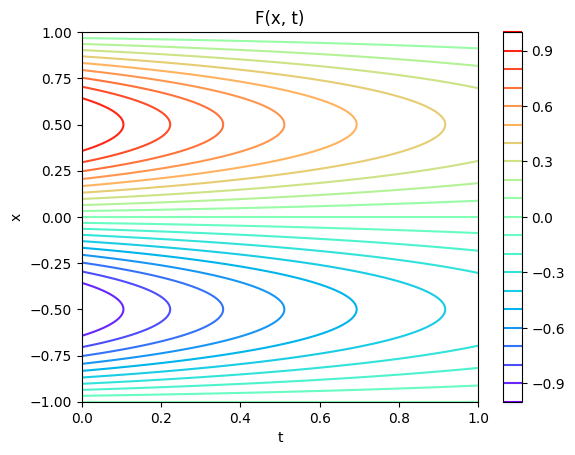

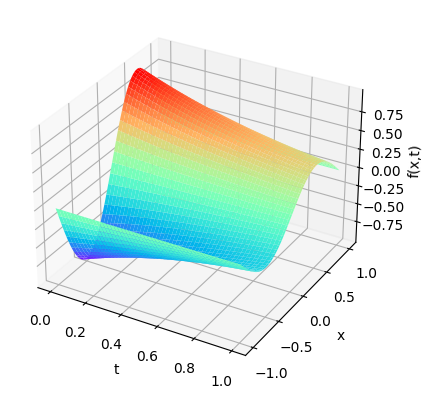

In [11]:
x = torch.linspace(-1, 1, 200).view(-1,1)
t = torch.linspace(0, 1, 100).view(-1,1)
X, T = torch.meshgrid(x.squeeze(1), t.squeeze(1))
y_real = f_real(X, T)
plot3D(x, t, y_real)

### Testing Data

In [13]:
x_test = torch.hstack((X.transpose(1,0).flatten()[:,None], T.transpose(1,0).flatten()[:,None]))
y_test = y_real.transpose(1,0).flatten()[:,None]

lb = x_test[0]
ub = x_test[-1]

print(x_test.shape, y_test.shape)
print(ub, lb)

torch.Size([20000, 2]) torch.Size([20000, 1])
tensor([1., 1.]) tensor([-1.,  0.])


In [19]:
left_x = torch.hstack((X[:,0][:,None], T[:,0][:,None]))
left_y = torch.sin(np.pi*left_x[:,0]).unsqueeze(1)

bottom_x = torch.hstack((X[-1,:][:,None], T[-1,:][:,None]))
bottom_y = torch.zeros(bottom_x.shape[0], 1)

top_x = torch.hstack((X[0,:][:,None], T[0,:][:,None]))
top_y = torch.zeros(top_x.shape[0], 1)

print(left_x.shape, left_y.shape)
print(bottom_x.shape, bottom_y.shape)
print(top_x.shape, top_y.shape)



torch.Size([200, 2]) torch.Size([200, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])


In [20]:
X_train = torch.vstack([left_x, bottom_x, top_x])
Y_train = torch.vstack([left_y, bottom_y, top_y])

Nu = 100
idx = np.random.choice(X_train.shape[0], Nu, replace=False)

X_train_Nu = X_train[idx,:]
Y_train_Nu = Y_train[idx,:]

### Collocation points

In [22]:
Nf = 10000
X_train_Nf = lb + (ub-lb)*lhs(2, Nf)
X_train_Nf = torch.vstack((X_train_Nf, X_train_Nu))

In [27]:
X_train_Nu = X_train_Nu.float().to(device)
Y_train_Nu = Y_train_Nu.float().to(device)
X_train_Nf = X_train_Nf.float().to(device)
f_hat = torch.zeros(X_train_Nf.shape[0], 1).to(device)

X_test = x_test.float().to(device)
Y_test = y_test.float().to(device)

## Neural Network

In [23]:
class FCN(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction='mean')
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers) - 1)])
        self.iter = 0
        for i in range(len(layers) - 1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            nn.init.zeros_(self.linears[i].bias.data)
    
    def forward(self, x):
        if torch.is_tensor(x) != True:
            x = torch.from_numpy(x)
        a = x.float()
        for i in range(len(layers) - 2):
            z = self.linears[i](a)
            a = self.activation(z)
        a = self.linears[-1](a)
        return a
    
    def lossBC(self, x_BC, y_BC):
        loss_BC = self.loss_function(self.forward(x_BC), y_BC)
        return loss_BC
    
    def lossPDE(self, x_PDE):
        g=x_PDE.clone()
        g.requires_grad=True
        f=self.forward(g)
        f_x_t = autograd.grad(f, g, torch.ones([g.shape[0], 1]).to(device), retain_graph=True, create_graph=True)[0] #first derivative
        f_xx_tt = autograd.grad(f_x_t, g, torch.ones(g.shape).to(device), create_graph=True)[0] #second derivative
        f_t = f_x_t[:, [1]]
        f_xx = f_xx_tt[:, [0]]
        f=f_t-f_xx+torch.exp(-g[:, 1:])*(torch.sin(np.pi*g[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * g[:, 0:1]))
        return self.loss_function(f, f_hat)
    
    def loss(self, x_BC, y_BC, x_PDE):
        loss_bc = self.lossBC(x_BC, y_BC)
        loss_pde = self.lossPDE(x_PDE)
        return loss_bc+loss_pde

## Training

In [25]:
layers=np.array([2, 32, 64, 1])
PINN = FCN(layers)
PINN.to(device)
print(PINN)

FCN(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [26]:
optimizer = optim.Adam(PINN.parameters(), lr = 1e-3, amsgrad=False)

In [28]:
for i in range(20000):
    loss = PINN.loss(X_train_Nu, Y_train_Nu, X_train_Nf)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i%(20000/10) == 0:
        with torch.no_grad():
            test_loss = PINN.lossBC(X_test, Y_test)
        print("Training: ", loss, "-----Testing: ", test_loss)

Training:  tensor(16.7221, grad_fn=<AddBackward0>) -----Testing:  tensor(0.1763)
Training:  tensor(0.0029, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0349)
Training:  tensor(0.0005, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0357)
Training:  tensor(0.0002, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0359)
Training:  tensor(0.0002, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0359)
Training:  tensor(0.0002, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0361)
Training:  tensor(0.0001, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0359)
Training:  tensor(0.0001, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0359)
Training:  tensor(9.5613e-05, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0359)
Training:  tensor(8.5691e-05, grad_fn=<AddBackward0>) -----Testing:  tensor(0.0360)


## Results

In [29]:
y1 = PINN(X_test)
x1 = X_test[:, 0]
t1 = X_test[:, 1]

In [30]:
arr_x1 = x1.reshape(shape=[100,200]).transpose(1, 0).detach().cpu()
arr_T1 = t1.reshape(shape=[100,200]).transpose(1, 0).detach().cpu()
arr_y1 = y1.reshape(shape=[100,200]).transpose(1, 0).detach().cpu()
arr_y_test = y_test.reshape(shape=[100,200]).transpose(1,0).detach().cpu()

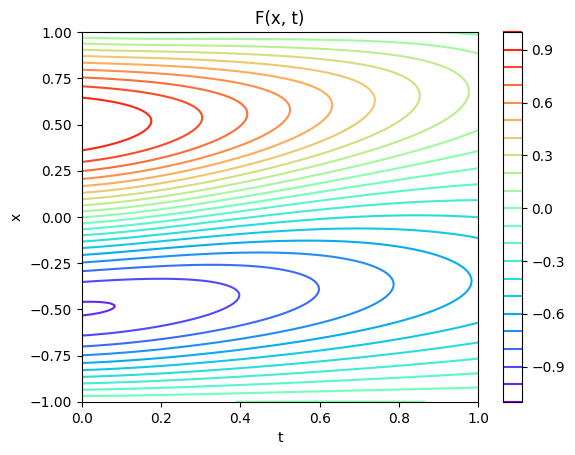

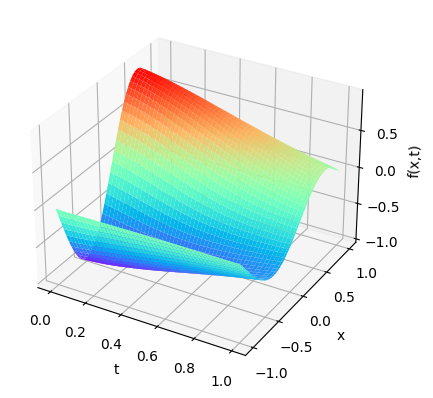

In [34]:
plot3D_Matrix(arr_x1, arr_T1, arr_y1)

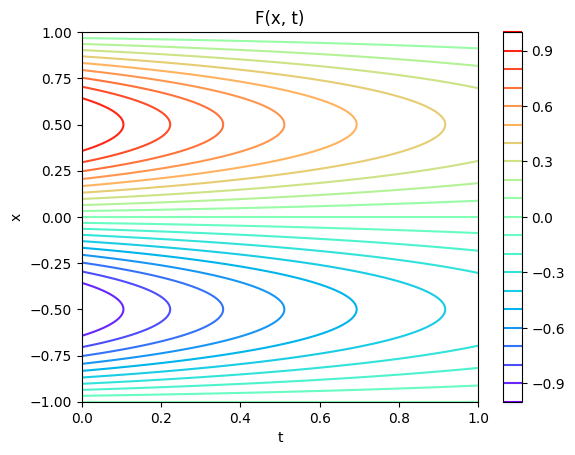

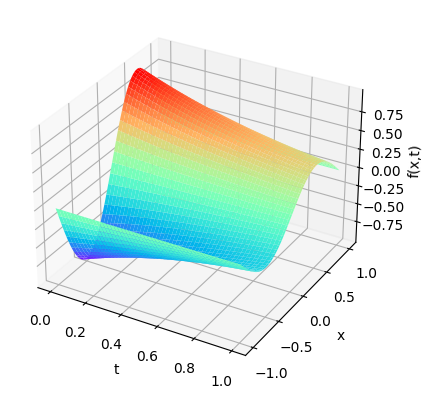

In [35]:
plot3D_Matrix(X, T, y_real)